[PROTECTED$11$](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-4/parallelization.ipynb) [PROTECTED$12$](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239934-lesson-1-parallelization)



# Âπ∂Ë°åËäÇÁÇπÊâßË°åÔºàParallel node executionÔºâ

## ËØÑËÆ∫ÔºàReviewÔºâ

In module 3, we went in-depth on `human-in-the loop`, showing 3 common use-cases:

Âú®Ê®°Âùó 3 ‰∏≠ÔºåÊàë‰ª¨Ê∑±ÂÖ•Êé¢ËÆ®‰∫Ü `human-in-the loop`ÔºåÂπ∂Â±ïÁ§∫‰∫Ü 3 ‰∏™Â∏∏ËßÅÁöÑÁî®‰æãÔºö

(1) `Approval` - We can interrupt our agent, surface state to a user, and allow the user to accept an action

`Approval` - Êàë‰ª¨ÂèØ‰ª•‰∏≠Êñ≠‰ª£ÁêÜÔºåÂ∞ÜÁä∂ÊÄÅÂëàÁé∞ÁªôÁî®Êà∑ÔºåÂπ∂ÂÖÅËÆ∏Áî®Êà∑Êé•ÂèóÊüê‰∏™Êìç‰Ωú

(2) `Debugging` - We can rewind the graph to reproduce or avoid issues

(2) `Debugging` - Êàë‰ª¨ÂèØ‰ª•ÂõûÈÄÄÂõæÂΩ¢‰ª•ÈáçÁé∞ÊàñÈÅøÂÖçÈóÆÈ¢ò

(3) `Editing` - You can modify the state 

(3) `Editing` - ÊÇ®ÂèØ‰ª•‰øÆÊîπÁä∂ÊÄÅ

## ÁõÆÊ†áÔºàGoalsÔºâ

This module will build on `human-in-the-loop` as well as the `memory` concepts discussed in module 2.

Êú¨Ê®°ÂùóÂ∞ÜÂú®Ê®°Âùó 2 ËÆ®ËÆ∫ÁöÑ `human-in-the-loop` ‰ª•Âèä `memory` Ê¶ÇÂøµÂü∫Á°Ä‰∏äËøõË°åÊûÑÂª∫„ÄÇ

We will dive into `multi-agent` workflows, and build up to a multi-agent research assistant that ties together all of the modules from this course.

Êàë‰ª¨Â∞ÜÊ∑±ÂÖ•Êé¢ËÆ® `multi-agent` Â∑•‰ΩúÊµÅÔºåÂπ∂ÊûÑÂª∫‰∏Ä‰∏™Â§öÂäüËÉΩÁöÑÁ†îÁ©∂Âä©ÊâãÔºåÂÆÉÂ∞ÜÊú¨ËØæÁ®ã‰∏≠ÁöÑÊâÄÊúâÊ®°Âùó‰∏≤ËÅîËµ∑Êù•„ÄÇ

To build this multi-agent research assistant, we'll first discuss a few LangGraph controllability topics.

‰∏∫‰∫ÜÊûÑÂª∫Ëøô‰∏™Â§öÊô∫ËÉΩ‰ΩìÁ†îÁ©∂Âä©ÊâãÔºåÊàë‰ª¨Â∞ÜÈ¶ñÂÖàËÆ®ËÆ∫‰∏Ä‰∫õ LangGraph ÂèØÊéßÊÄß‰∏ªÈ¢ò„ÄÇ

We'll start with [parallelization](https://langchain-ai.github.io/langgraph/how-tos/branching/#how-to-create-branches-for-parallel-node-execution).

Êàë‰ª¨Â∞Ü‰ªé [parallelization](https://langchain-ai.github.io/langgraph/how-tos/branching/#how-to-create-branches-for-parallel-node-execution) ÂºÄÂßã„ÄÇ

## ÂàÜÊï£‰∏éÊ±áËÅöÔºàFan out and fan inÔºâ

Let's build a simple linear graph that over-writes the state at each step.

ËÆ©Êàë‰ª¨ÊûÑÂª∫‰∏Ä‰∏™ÁÆÄÂçïÁöÑÁ∫øÊÄßÂõæÔºåËØ•ÂõæÂú®ÊØè‰∏ÄÊ≠•ÈÉΩ‰ºöË¶ÜÁõñÁä∂ÊÄÅ„ÄÇ



In [ ]:
%%capture --no-stderr
%pip install -U  langgraph tavily-python wikipedia langchain_openai langchain_community langgraph_sdk

In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

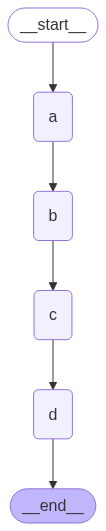

In [1]:
from IPython.display import Image, display

from typing import Any
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    # operator.add reducer ÂáΩÊï∞‰ΩøÂÖ∂Êàê‰∏∫‰ªÖËøΩÂä†ÁöÑ„ÄÇ
    state: str

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state": [self._value]}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

We over-write state, as expected.

Êàë‰ª¨ÊåâÈ¢ÑÊúüË¶ÜÁõñÁä∂ÊÄÅ„ÄÇ



In [3]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm B"]
Adding I'm D to ["I'm C"]


{'state': ["I'm D"]}

Now, let's run `b` and `c` in parallel. 

Áé∞Âú®ÔºåËÆ©Êàë‰ª¨Âπ∂Ë°åËøêË°å `b` Âíå `c`„ÄÇ

And then run `d`.

ÁÑ∂ÂêéËøêË°å `d`.

We can do this easily with fan-out from `a` to `b` and `c`, and then fan-in to `d`.

Êàë‰ª¨ÂèØ‰ª•ËΩªÊùæÂú∞‰ªé `a` Âà∞ `b` Âíå `c` ËøõË°åÂàÜÂèëÔºåÁÑ∂ÂêéÊ±áËÅöÂà∞ `d`„ÄÇ

The the state updates are applied at the end of each step.

Áä∂ÊÄÅÊõ¥Êñ∞Âú®ÊØè‰∏™Ê≠•È™§ÁöÑÊú´Â∞æÂ∫îÁî®„ÄÇ

Let's run it.

ËÆ©Êàë‰ª¨ËøêË°åÂÆÉ„ÄÇ



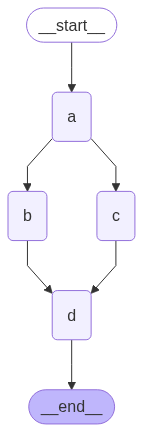

In [4]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

**We see an error**! 

**Êàë‰ª¨ÁúãÂà∞‰∏Ä‰∏™ÈîôËØØ**ÔºÅ

This is because both `b` and `c` are writing to the same state key / channel in the same step. 


In [5]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
An error occurred: At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


When using fan out, we need to be sure that we are using a reducer if steps are writing to the same the channel / key. 

Âú®‰ΩøÁî®ÊâáÂá∫Êó∂ÔºåÊàë‰ª¨ÈúÄË¶ÅÁ°Æ‰øùÂ¶ÇÊûúÊ≠•È™§ÂÜôÂÖ•Áõ∏ÂêåÁöÑÈÄöÈÅì/ÈîÆÔºåÂàô‰ΩøÁî®ÂΩíÁ∫¶Âô®„ÄÇ

As we touched on in Module 2, `operator.add` is a function from Python's built-in operator module.

Ê≠£Â¶ÇÊàë‰ª¨Âú®Á¨¨2Ê®°Âùó‰∏≠ÊèêÂà∞ÁöÑÔºå`operator.add` ÊòØ Python ÂÜÖÁΩÆ operator Ê®°Âùó‰∏≠ÁöÑ‰∏Ä‰∏™ÂáΩÊï∞„ÄÇ

When `operator.add` is applied to lists, it performs list concatenation.

ÂΩì `operator.add` Â∫îÁî®‰∫éÂàóË°®Êó∂ÔºåÂÆÉÊâßË°åÂàóË°®ËøûÊé•„ÄÇ



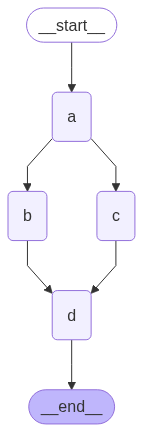

In [6]:
import operator
from typing import Annotated

class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    state: Annotated[list, operator.add]

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm D to ["I'm A", "I'm B", "I'm C"]


{'state': ["I'm A", "I'm B", "I'm C", "I'm D"]}

Now we see that we append to state for the updates made in parallel by `b` and `c`.

Áé∞Âú®Êàë‰ª¨ÁúãÂà∞ÔºåÊàë‰ª¨Âú®Áä∂ÊÄÅ‰∏≠ËøΩÂä†‰∫ÜÁî± `b` Âíå `c` Âπ∂Ë°åËøõË°åÁöÑÊõ¥Êñ∞„ÄÇ



## Á≠âÂæÖËäÇÁÇπÂÆåÊàêÔºàWaiting for nodes to finishÔºâ

Now, lets consider a case where one parallel path has more steps than the other one.

Áé∞Âú®ÔºåËÆ©Êàë‰ª¨ËÄÉËôë‰∏Ä‰∏™Ê°à‰æãÔºåÂÖ∂‰∏≠‰∏Ä‰∏™Âπ∂Ë°åË∑ØÂæÑÁöÑÊ≠•È™§ÊØîÂè¶‰∏Ä‰∏™Â§ö„ÄÇ



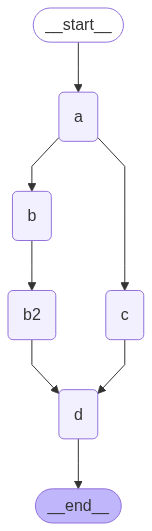

In [8]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In this case, `b`, `b2`, and `c` are all part of the same step.

Âú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºå`b`„ÄÅ`b2` Âíå `c` ÈÉΩÊòØÂêå‰∏Ä‰∏™Ê≠•È™§ÁöÑ‰∏ÄÈÉ®ÂàÜ„ÄÇ

The graph will wait for all of these to be completed before proceeding to step `d`. 

ÂõæÂΩ¢Â∞ÜÂú®ËøõÂÖ• `d` Ê≠•È™§‰πãÂâçÁ≠âÂæÖÊâÄÊúâËøô‰∫õÊìç‰ΩúÂÆåÊàê„ÄÇ



In [9]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm D to ["I'm A", "I'm B", "I'm C", "I'm B2"]


{'state': ["I'm A", "I'm B", "I'm C", "I'm B2", "I'm D"]}

## ËÆæÁΩÆÁä∂ÊÄÅÊõ¥Êñ∞ÁöÑÈ°∫Â∫èÔºàSetting the order of state updatesÔºâ

However, within each step we don't have specific control over the order of the state updates!

ÁÑ∂ËÄåÔºåÂú®ÊØè‰∏™Ê≠•È™§‰∏≠ÔºåÊàë‰ª¨Êó†Ê≥ïÂØπÁä∂ÊÄÅÊõ¥Êñ∞ÁöÑÈ°∫Â∫èËøõË°åÂÖ∑‰ΩìÊéßÂà∂ÔºÅ

In simple terms, it is a deterministic order determined by LangGraph based upon graph topology that **we do not control**. 

ÁÆÄÂçïÊù•ËØ¥ÔºåÂÆÉÊòØÂü∫‰∫éÂõæÊãìÊâëÁªìÊûÑÁî± LangGraph Á°ÆÂÆöÁöÑÁ°ÆÂÆöÊÄßÈ°∫Â∫èÔºåËØ•È°∫Â∫è‰∏∫ **Êàë‰ª¨Êó†Ê≥ïÊéßÂà∂**„ÄÇ

Above, we see that `c` is added before `b2`.

‰∏äÈù¢ÔºåÊàë‰ª¨ÁúãÂà∞ `c` Ë¢´Ê∑ªÂä†Âú® `b2` ‰πãÂâç„ÄÇ

However, we can use a custom reducer to customize this e.g., sort state updates.

ÁÑ∂ËÄåÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî®Ëá™ÂÆö‰πâ reducer Êù•ÂÆöÂà∂Ê≠§ÂäüËÉΩÔºå‰æãÂ¶ÇÔºåÂØπÁä∂ÊÄÅÊõ¥Êñ∞ËøõË°åÊéíÂ∫è„ÄÇ



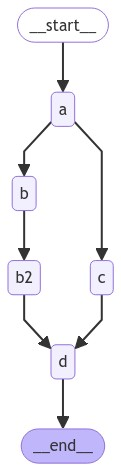

In [ ]:
def sorting_reducer(left, right):
    """ ÂêàÂπ∂Âπ∂ÊéíÂ∫èÂàóË°®‰∏≠ÁöÑÂÄº"""
    # Â¶ÇÊûú left ‰∏çÊòØÂàóË°®ÔºåÂàôÂ∞ÜÂÖ∂ËΩ¨Êç¢‰∏∫ÂàóË°®
    if not isinstance(left, list):
        left = [left]

    # Â¶ÇÊûú right ‰∏çÊòØÂàóË°®ÔºåÂàôÂ∞ÜÂÖ∂ËΩ¨Êç¢‰∏∫ÂàóË°®
    if not isinstance(right, list):
        right = [right]
    
    # ÂêàÂπ∂ left Âíå right ÂàóË°®ÔºåÁÑ∂ÂêéÂçáÂ∫èÊéíÂ∫è
    return sorted(left + right, reverse=False)
class State(TypedDict):
    # sorting_reducer ÂáΩÊï∞Â∞ÜÂØπ state ‰∏≠ÁöÑÂÄºËøõË°åÊéíÂ∫è
    state: Annotated[list, sorting_reducer]

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm C to ["I'm A"]
Adding I'm B to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm D to ["I'm A", "I'm B", "I'm B2", "I'm C"]


{'state': ["I'm A", "I'm B", "I'm B2", "I'm C", "I'm D"]}

Now, the reducer sorts the updated state values!

Áé∞Âú®Ôºåreducer ÂØπÊõ¥Êñ∞ÁöÑÁä∂ÊÄÅÂÄºËøõË°åÊéíÂ∫èÔºÅ

The `sorting_reducer` example sorts all values globally. We can also: 

`sorting_reducer` Á§∫‰æãÂØπÊâÄÊúâÂÄºËøõË°åÂÖ®Â±ÄÊéíÂ∫è„ÄÇÊàë‰ª¨ËøòÂèØ‰ª•Ôºö

1. Write outputs to a separate field in the state during the parallel step
2. Use a "sink" node after the parallel step to combine and order those outputs
3. Clear the temporary field after combining

1. Âú®Âπ∂Ë°åÊ≠•È™§ÊúüÈó¥Â∞ÜËæìÂá∫ÂÜôÂÖ•Áä∂ÊÄÅ‰∏≠ÁöÑÂçïÁã¨Â≠óÊÆµ  
2. Âú®Âπ∂Ë°åÊ≠•È™§‰πãÂêé‰ΩøÁî®‚ÄúÊ±á‚ÄùËäÇÁÇπÊù•ÂêàÂπ∂ÂíåÊéíÂ∫èËøô‰∫õËæìÂá∫  
3. ÂêàÂπ∂ÂêéÊ∏ÖÈô§‰∏¥Êó∂Â≠óÊÆµ

See the [docs](https://langchain-ai.github.io/langgraph/how-tos/branching/#stable-sorting) for more details.


ËØ∑ÂèÇÈòÖ [docs](https://langchain-ai.github.io/langgraph/how-tos/branching/#stable-sorting) ‰ª•Ëé∑ÂèñÊõ¥Â§öËØ¶ÁªÜ‰ø°ÊÅØ„ÄÇ



## ‰ΩøÁî® LLMs Â∑•‰ΩúÔºàWorking with LLMsÔºâ

Now, lets add a realistic example! 

Áé∞Âú®ÔºåËÆ©Êàë‰ª¨Ê∑ªÂä†‰∏Ä‰∏™Áé∞ÂÆû‰∏≠ÁöÑ‰æãÂ≠êÔºÅ

We want to gather context from two external sources (Wikipedia and Web-Search) and have an LLM answer a question.

Êàë‰ª¨Â∏åÊúõ‰ªé‰∏§‰∏™Â§ñÈÉ®Êù•Ê∫êÔºàWikipedia Âíå Web-SearchÔºâÊî∂ÈõÜ‰∏ä‰∏ãÊñá‰ø°ÊÅØÔºåÂπ∂ËÆ© LLM ÂõûÁ≠î‰∏Ä‰∏™ÈóÆÈ¢ò„ÄÇ



In [10]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    model="qwen-plus-2025-04-28",
    api_key="sk-ba2dda3817f145d7af141fdf32e31d90",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1"
)

In [11]:
class State(TypedDict):
    question: str
    answer: str
    context: Annotated[list, operator.add]

You can try different web search tools. [Tavily](https://tavily.com/) is one nice option to consider, but ensure your `TAVILY_API_KEY` is set.

‰Ω†ÂèØ‰ª•Â∞ùËØï‰∏çÂêåÁöÑÁΩëÁªúÊêúÁ¥¢Â∑•ÂÖ∑„ÄÇ[Tavily](https://tavily.com/) ÊòØ‰∏Ä‰∏™‰∏çÈîôÁöÑÈÄâÊã©Ôºå‰ΩÜË¶ÅÁ°Æ‰øù‰Ω†ÁöÑ `TAVILY_API_KEY` Â∑≤ËÆæÁΩÆ„ÄÇ



In [12]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
_set_env("TAVILY_API_KEY")

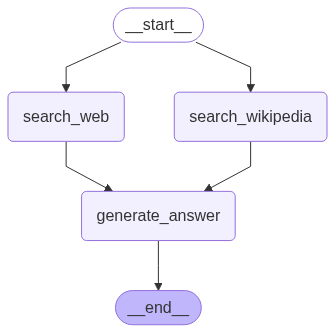

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools import TavilySearchResults

def search_web(state):
    
    """ ‰ªéÁΩëÁªúÊêúÁ¥¢‰∏≠Ê£ÄÁ¥¢ÊñáÊ°£ """

    # ÊêúÁ¥¢
    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state['question'])

     # Â∞ÜÂ§ö‰∏™ÊêúÁ¥¢ÊñáÊ°£ËΩ¨Êç¢Êàê‰∫Ü‰∏Ä‰∏™Áªü‰∏ÄÊ†ºÂºèÁöÑÈïøÊñáÊú¨ÔºåÊØè‰∏™ÊñáÊ°£ÈÉΩÊúâËá™Â∑±ÁöÑÂÖÉÊï∞ÊçÆÔºàÂ¶ÇURLÔºâÔºåÂπ∂‰∏îÊñáÊ°£‰πãÈó¥ÊúâÊòéÁ°ÆÁöÑÂàÜÈöîÔºå‰æø‰∫éÂêéÁª≠Â§ÑÁêÜÊàñÂ±ïÁ§∫„ÄÇ
    """
    - ËøôÊòØ‰∏Ä‰∏™ ÂàóË°®Êé®ÂØºÂºè (list comprehension) ÔºåÂÆÉ‰ºöÈÅçÂéÜ search_docs ÂàóË°®‰∏≠ÁöÑÊØè‰∏Ä‰∏™ÂÖÉÁ¥†ÔºàËøôÈáåÊàë‰ª¨Áß∞‰πã‰∏∫ doc Ôºâ„ÄÇ
    - search_docs ÈáåÁöÑÊØè‰∏™ doc Â∫îËØ•ÊòØ‰∏Ä‰∏™ÂåÖÂê´ 'url' Âíå 'content' ÈîÆÁöÑÂ≠óÂÖ∏„ÄÇ
    """
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def search_wikipedia(state):
    
    """ ‰ªéÁª¥Âü∫ÁôæÁßë‰∏≠Ê£ÄÁ¥¢ÊñáÊ°£ """

    # ÊêúÁ¥¢
    search_docs = WikipediaLoader(query=state['question'], 
                                  load_max_docs=2).load()

     # Ê†ºÂºèÂåñ
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}">\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def generate_answer(state):
    
    """ Áî®‰∫éÂõûÁ≠îÈóÆÈ¢òÁöÑËäÇÁÇπ """

    # Ëé∑ÂèñÁä∂ÊÄÅ
    context = state["context"]
    question = state["question"]

    # Ê®°Êùø
    answer_template = """‰ΩøÁî®‰ª•‰∏ã‰∏ä‰∏ãÊñáÂõûÁ≠îÈóÆÈ¢ò {question}: {context}"""
    answer_instructions = answer_template.format(question=question, 
                                                       context=context)    
    
    # ÂõûÁ≠î
    answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"ÂõûÁ≠îÈóÆÈ¢ò„ÄÇ")])
      
    # Â∞ÜÂÖ∂ÈôÑÂä†Âà∞Áä∂ÊÄÅ
    return {"answer": answer}

# Ê∑ªÂä†ËäÇÁÇπ
builder = StateGraph(State)

# ÂàùÂßãÂåñÊØè‰∏™ËäÇÁÇπ
builder.add_node("search_web",search_web)
builder.add_node("search_wikipedia", search_wikipedia)
builder.add_node("generate_answer", generate_answer)

# ÊµÅÁ®ã
builder.add_edge(START, "search_wikipedia")
builder.add_edge(START, "search_web")
builder.add_edge("search_wikipedia", "generate_answer")
builder.add_edge("search_web", "generate_answer")
builder.add_edge("generate_answer", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
result = graph.invoke({"question": "Ëã±‰ºüËææ2025Âπ¥Á¨¨‰∏ÄÂ≠£Â∫¶Ë¥¢Êä•Ë°®Áé∞Â¶Ç‰Ωï"})
result['answer'].content

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

## ‰ΩøÁî® LangGraph APIÔºàUsing with LangGraph APIÔºâ

**‚ö†Ô∏è DISCLAIMER**

**‚ö†Ô∏è Ê≥®ÊÑè‰∫ãÈ°π**

Since the filming of these videos, we've updated Studio so that it can be run locally and opened in your browser. This is now the preferred way to run Studio (rather than using the Desktop App as shown in the video). See documentation [here](https://langchain-ai.github.io/langgraph/concepts/langgraph_studio/#local-development-server) on the local development server and [here](https://langchain-ai.github.io/langgraph/how-tos/local-studio/#run-the-development-server). To start the local development server, run the following command in your terminal in the `/studio` directory in this module:

Ëá™‰ªéËøô‰∫õËßÜÈ¢ëÁöÑÊãçÊëÑ‰ª•Êù•ÔºåÊàë‰ª¨Â∑≤ÁªèÊõ¥Êñ∞‰∫Ü StudioÔºå‰ΩøÂÖ∂ÂèØ‰ª•Âú®Êú¨Âú∞ËøêË°åÂπ∂Âú®ÊµèËßàÂô®‰∏≠ÊâìÂºÄ„ÄÇËøôÊòØÁé∞Âú®ËøêË°å Studio ÁöÑÈ¶ñÈÄâÊñπÂºèÔºàËÄå‰∏çÊòØÂÉèËßÜÈ¢ë‰∏≠ÊâÄÁ§∫‰ΩøÁî®Ê°åÈù¢Â∫îÁî®Á®ãÂ∫èÔºâ„ÄÇËØ∑ÂèÇÈòÖÊúâÂÖ≥ [here](https://langchain-ai.github.io/langgraph/concepts/langgraph_studio/#local-development-server) Êú¨Âú∞ÂºÄÂèëÊúçÂä°Âô®ÁöÑÊñáÊ°£Âíå [here](https://langchain-ai.github.io/langgraph/how-tos/local-studio/#run-the-development-server)„ÄÇË¶ÅÂêØÂä®Êú¨Âú∞ÂºÄÂèëÊúçÂä°Âô®ÔºåËØ∑Âú®Êú¨Ê®°ÂùóÁöÑ `/studio` ÁõÆÂΩï‰∏ãÁöÑÁªàÁ´Ø‰∏≠ËøêË°å‰ª•‰∏ãÂëΩ‰ª§Ôºö

```
langgraph dev
```

You should see the following output:
```
- üöÄ API: http://127.0.0.1:2024
- üé® Studio UI: https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
- üìö API Docs: http://127.0.0.1:2024/docs
```

‰Ω†Â∫îËØ•ÁúãÂà∞‰ª•‰∏ãËæìÂá∫Ôºö  
```
- üöÄ API: http://127.0.0.1:2024
- üé® Studio UI: https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
- üìö API Docs: http://127.0.0.1:2024/docs
```

Open your browser and navigate to the Studio UI: `https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024`.

ÊâìÂºÄÊÇ®ÁöÑÊµèËßàÂô®Âπ∂ÂØºËà™Âà∞ Studio UIÔºö`https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024`„ÄÇ



In [ ]:
if 'google.colab' in str(get_ipython()):
    raise Exception("Unfortunately LangGraph Studio is currently not supported on Google Colab")

In [17]:
from langgraph_sdk import get_client
client = get_client(url="http://127.0.0.1:2024")

In [18]:
thread = await client.threads.create()
input_question = {"question": "How were Nvidia Q2 2024 earnings?"}
async for event in client.runs.stream(thread["thread_id"], 
                                      assistant_id="parallelization", 
                                      input=input_question, 
                                      stream_mode="values"):
    # Check if answer has been added to state  
    answer = event.data.get('answer', None)
    if answer:
        print(answer['content'])

Nvidia's Q2 2024 earnings were exceptionally strong. The company reported $13.5 billion in revenue, significantly surpassing expectations, and made $6 billion in pure profit. The earnings per share were $2.70, adjusted, compared to the $2.09 per share expected by analysts. The gross profit margins were 75.1%, and the adjusted earnings per share were 68 cents. The strong performance was driven by unprecedented demand for its generative AI chips.
